### SMOTE (Synthetic Minority Over-sampling Technique): 
#### Generate synthetic samples by interpolating between existing samples of the minority class.
#### In random oversampling you will get the same sample values like you already had. but SMOTE will take the nearest values and generate some random values in between them. This will have a variance.

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(123)

n_class_0 = 900
n_class_1 = 100

In [3]:
df_class_0 = pd.DataFrame({
    'f1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'f2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

df_class_1 = pd.DataFrame({
    'f1': np.random.normal(loc=0, scale=1, size=n_class_1),
    'f2': np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [4]:
df_class_0,df_class_1

(           f1        f2  target
 0   -1.085631  0.551302       0
 1    0.997345  0.419589       0
 2    0.282978  1.815652       0
 3   -1.506295 -0.252750       0
 4   -0.578600 -0.292004       0
 ..        ...       ...     ...
 895  0.238761 -0.003155       0
 896 -1.106386 -0.430660       0
 897  0.366732 -0.146416       0
 898  1.023906  1.160176       0
 899 -0.210056 -0.641512       0
 
 [900 rows x 3 columns],
           f1        f2  target
 0  -0.300232  0.139033       1
 1  -0.632261  0.025577       1
 2  -0.204317 -0.196443       1
 3   0.213696  1.312255       1
 4   1.033878  1.187417       1
 ..       ...       ...     ...
 95 -0.623629  0.845701       1
 96  0.239810 -1.119923       1
 97 -0.868240 -0.359297       1
 98  0.902006 -1.609695       1
 99  0.697490  0.013570       1
 
 [100 rows x 3 columns])

In [5]:
df = pd.concat([df_class_0,df_class_1]).reset_index(drop='True')
df

,f1,f2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,-0.623629,0.845701,1
996,0.239810,-1.119923,1
997,-0.868240,-0.359297,1
998,0.902006,-1.609695,1


In [6]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

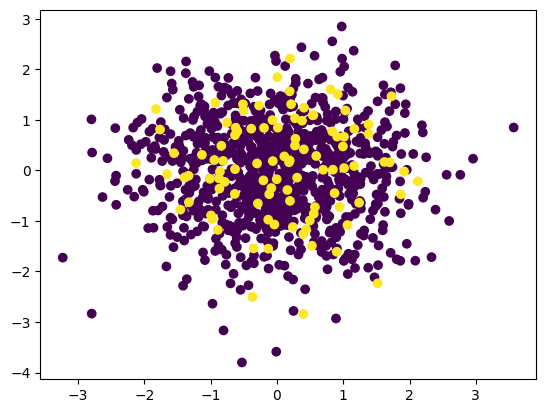

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'], df['f2'], c=df['target'])

In [8]:
df_features = df.drop('target', axis = 1)
df_target = df['target']

df_features,df_target

(           f1        f2
 0   -1.085631  0.551302
 1    0.997345  0.419589
 2    0.282978  1.815652
 3   -1.506295 -0.252750
 4   -0.578600 -0.292004
 ..        ...       ...
 995 -0.623629  0.845701
 996  0.239810 -1.119923
 997 -0.868240 -0.359297
 998  0.902006 -1.609695
 999  0.697490  0.013570
 
 [1000 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 995    1
 996    1
 997    1
 998    1
 999    1
 Name: target, Length: 1000, dtype: int64)

In [9]:
df_features.shape

(1000, 2)

In [10]:
df_target.shape

(1000,)

In [11]:
print(len(df_target[df_target==0]))
print(len(df_target[df_target==1]))

900
100


In [12]:
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()

df_features_oversampling,df_target_oversampling = oversampling.fit_resample(df_features,df_target)

In [13]:
df_features_oversampling.shape

(1800, 2)

In [14]:
df_target_oversampling.shape

(1800,)

In [15]:
print(type(df_features_oversampling))
print(type(df_target_oversampling))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [16]:
print(len(df_target_oversampling[df_target_oversampling==0]))
print(len(df_target_oversampling[df_target_oversampling==1]))

900
900


In [17]:
df_features_oversampling

,f1,f2
0,-1.085631,0.551302
1,0.997345,0.419589
2,0.282978,1.815652
3,-1.506295,-0.252750
4,-0.578600,-0.292004
...,...,...
1795,-0.909345,0.299404
1796,-0.105295,1.051485
1797,0.391335,1.093234
1798,0.392714,-1.257877


In [18]:
df_target_oversampling

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [20]:
final_df = pd.concat([df_features_oversampling,df_target_oversampling],axis=1)
final_df

,f1,f2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
1795,-0.909345,0.299404,1
1796,-0.105295,1.051485,1
1797,0.391335,1.093234,1
1798,0.392714,-1.257877,1


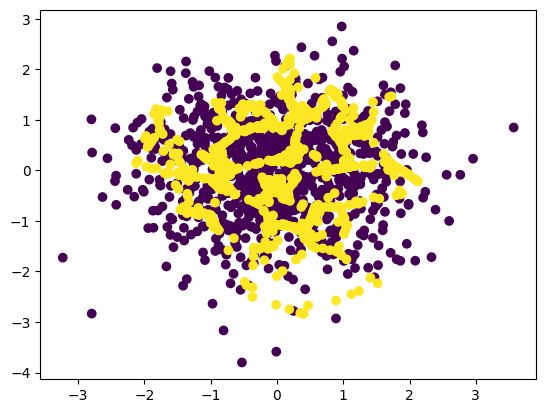

In [21]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

#### As you can see the data is distributed evenly. but in random oversampling you can see the points wont change even after the resampling. That is because, you are getting same points even after resampling.
#### but here you can see the points got increased because it takes the nearest values and create new sample points in between them.